# 타자 월별 성적 변화 비교 분석

In [1]:
import pandas as pd

file = './data/KBO_2019_player_gamestats.csv'

raw = pd.read_csv(file, encoding = 'cp949')

In [2]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [3]:
raw.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA'],
      dtype='object')

In [4]:
# '일자' 컬럼으로 '월' 컬럼 생성
month_list = []

for monthdate in raw['일자']:
    month = monthdate.split('-')[0]
    month_list.append(month)
    
month_list

raw['월'] = month_list

raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,월
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,03
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,03
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,03
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,03
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,03


In [26]:
columns_select = ['팀','이름', '생일', '일자', '상대', '타수', '안타', '홈런', '루타', '타점', '볼넷', '사구' ,'희비', '월']
data = raw[columns_select]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비,월
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0,03
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0,03
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0,03
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0,03
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0,03


In [27]:
data_plyear_month=data.pivot_table(index = ['팀','이름','생일','월'],
                values = ['타수', '안타', '홈런', '루타', '타점', '볼넷', '사구' ,'희비'],
                aggfunc = 'sum')

data_plyear_month.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         월                                 
KIA 고영창 1989-02-24 04   0   0   0   0   0   0   0   0
    김선빈 1989-12-18 03   5   4   0   3  18   0   0   0
                   04  17   3   0  13  44   6   0   0
                   05  31  10   0  24  82  10   1   2
                   06  29   8   1  24  81   8   1   0

In [28]:
data_plyear_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1261 entries, ('KIA', '고영창', '1989-02-24', '04') to ('한화', '호잉', '1989-05-18', '09')
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   루타      1261 non-null   int64
 1   볼넷      1261 non-null   int64
 2   사구      1261 non-null   int64
 3   안타      1261 non-null   int64
 4   타수      1261 non-null   int64
 5   타점      1261 non-null   int64
 6   홈런      1261 non-null   int64
 7   희비      1261 non-null   int64
dtypes: int64(8)
memory usage: 91.0+ KB


In [29]:
data_plyear_month = data_plyear_month.reset_index()
data_plyear_month

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1256,한화,호잉,1989-05-18,05,47,9,2,31,100,14,3,0
1257,한화,호잉,1989-05-18,06,41,4,1,23,93,13,4,0
1258,한화,호잉,1989-05-18,07,42,6,1,26,72,13,4,1
1259,한화,호잉,1989-05-18,08,41,4,1,26,94,13,3,0


In [30]:
def cal_hit(df):
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타']+df['볼넷']+df['사구']) / (df['타수']+df['볼넷']+df['사구']+df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    
    return df

In [31]:
data_plyear_month_stat = cal_hit(data_plyear_month)
data_plyear_month_stat.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0,0.166667,0.318182,0.277778,0.595960
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0,0.295455,0.340426,0.386364,0.726789
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2,0.292683,0.361702,0.378049,0.739751
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0,0.296296,0.366667,0.358025,0.724691


In [32]:
data_plyear_month_stat= data_plyear_month_stat.dropna()

In [33]:
# 월별 OPS
month_pivot = data_plyear_month_stat.pivot_table(index = ['팀','이름','생일'],
                                  values = 'OPS',
                                  columns = '월')
month_pivot.head()

월                         03        04        05        06        07  \
팀   이름  생일                                                             
KIA 김선빈 1989-12-18  0.595960  0.726789  0.739751  0.724691  0.905983   
    김주찬 1981-03-25  0.585227  0.471658  0.707108  0.667142  0.881818   
    나지완 1985-05-19  0.679487  0.895474  0.522581  0.789567  0.142857   
    류승현 1997-07-01  0.000000  0.687500  0.703202  0.576998       NaN   
    문경찬 1992-07-08  0.000000       NaN       NaN       NaN       NaN   

월                         08        09  10  
팀   이름  생일                                  
KIA 김선빈 1989-12-18  0.642222  0.811364 NaN  
    김주찬 1981-03-25  0.896737  0.666667 NaN  
    나지완 1985-05-19       NaN       NaN NaN  
    류승현 1997-07-01       NaN  0.630719 NaN  
    문경찬 1992-07-08       NaN       NaN NaN

In [34]:
# 시즌 타자 성적 불러오기

file = './data/player_stat.csv'
player_stat = pd.read_csv(file, encoding = 'cp949')
player_stat.head()

,index,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,31,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.397942,0.557895,0.955836
1,32,키움,샌즈,1987-09-28,296,86,6,170,568,119,28,5,0.299296,0.393985,0.521127,0.915112
2,28,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.396127,0.514831,0.910957
3,3,KT,로하스,1990-05-24,276,49,3,168,521,104,24,5,0.322457,0.380623,0.529750,0.910373
4,15,SK,최정,1987-02-28,261,71,26,147,511,99,29,8,0.287671,0.396104,0.510763,0.906867


In [35]:
# 시즌기록과 월별 기록 결합

df = pd.merge(player_stat, month_pivot, how = 'left', left_on = ['팀','이름','생일'], right_on =['팀','이름','생일'])
df.head()

,index,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,...,장타율,OPS,03,04,05,06,07,08,09,10
0,31,키움,박병호,1986-07-10,265,85,14,133,475,107,...,0.557895,0.955836,0.892361,1.194570,0.860709,0.875000,0.814349,1.051106,0.955270,0.892456
1,32,키움,샌즈,1987-09-28,296,86,6,170,568,119,...,0.521127,0.915112,0.864550,1.026820,0.842696,1.013043,1.218102,0.969475,0.524246,0.621199
2,28,삼성,러프,1986-07-28,243,80,7,138,472,101,...,0.514831,0.910957,1.006588,0.914870,0.842949,1.127528,0.769687,0.858272,0.893590,NaN
3,3,KT,로하스,1990-05-24,276,49,3,168,521,104,...,0.529750,0.910373,0.601754,0.790780,0.984779,1.166232,0.812406,1.017905,0.754111,NaN
4,15,SK,최정,1987-02-28,261,71,26,147,511,99,...,0.510763,0.906867,0.550481,0.956457,0.848631,1.497368,0.728571,0.785574,0.867937,0.142857


In [36]:
df_sort = df.sort_values(by = 'OPS', ascending = False)
df_sort.head(10)

,index,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,...,장타율,OPS,03,04,05,06,07,08,09,10
0,31,키움,박병호,1986-07-10,265,85,14,133,475,107,...,0.557895,0.955836,0.892361,1.194570,0.860709,0.875000,0.814349,1.051106,0.955270,0.892456
1,32,키움,샌즈,1987-09-28,296,86,6,170,568,119,...,0.521127,0.915112,0.864550,1.026820,0.842696,1.013043,1.218102,0.969475,0.524246,0.621199
2,28,삼성,러프,1986-07-28,243,80,7,138,472,101,...,0.514831,0.910957,1.006588,0.914870,0.842949,1.127528,0.769687,0.858272,0.893590,NaN
3,3,KT,로하스,1990-05-24,276,49,3,168,521,104,...,0.529750,0.910373,0.601754,0.790780,0.984779,1.166232,0.812406,1.017905,0.754111,NaN
4,15,SK,최정,1987-02-28,261,71,26,147,511,99,...,0.510763,0.906867,0.550481,0.956457,0.848631,1.497368,0.728571,0.785574,0.867937,0.142857
5,1,KIA,최형우,1983-12-16,221,85,7,137,456,86,...,0.484649,0.897262,0.781609,0.786702,0.980000,0.888904,0.780000,0.979832,0.978261,NaN
6,21,두산,페르난데스,1988-04-27,277,63,6,197,581,90,...,0.476764,0.882252,0.913420,1.140263,0.822351,0.900026,0.708333,0.941609,0.721534,0.609907
7,13,SK,로맥,1985-09-30,263,73,6,142,515,96,...,0.510680,0.879013,0.620690,0.750427,1.006061,0.833163,0.963636,0.709550,1.081950,1.214286
8,30,키움,김하성,1995-10-17,283,76,7,177,587,109,...,0.482112,0.866160,0.805405,0.901283,1.033712,0.862978,0.706597,0.930425,0.792960,0.675729
9,19,두산,오재일,1986-10-29,236,56,3,140,480,106,...,0.491667,0.858149,0.623750,0.653439,0.828571,0.864316,1.069131,1.058255,0.715097,0.855072


In [37]:
# 데이터 정렬

df_selected = df_sort[['팀', '이름','OPS', '03', '04', '05', '06', '07', '08',
       '09', '10']]
df_selected.head(10)

,팀,이름,OPS,03,04,05,06,07,08,09,10
0,키움,박병호,0.955836,0.892361,1.194570,0.860709,0.875000,0.814349,1.051106,0.955270,0.892456
1,키움,샌즈,0.915112,0.864550,1.026820,0.842696,1.013043,1.218102,0.969475,0.524246,0.621199
2,삼성,러프,0.910957,1.006588,0.914870,0.842949,1.127528,0.769687,0.858272,0.893590,NaN
3,KT,로하스,0.910373,0.601754,0.790780,0.984779,1.166232,0.812406,1.017905,0.754111,NaN
4,SK,최정,0.906867,0.550481,0.956457,0.848631,1.497368,0.728571,0.785574,0.867937,0.142857
5,KIA,최형우,0.897262,0.781609,0.786702,0.980000,0.888904,0.780000,0.979832,0.978261,NaN
6,두산,페르난데스,0.882252,0.913420,1.140263,0.822351,0.900026,0.708333,0.941609,0.721534,0.609907
7,SK,로맥,0.879013,0.620690,0.750427,1.006061,0.833163,0.963636,0.709550,1.081950,1.214286
8,키움,김하성,0.866160,0.805405,0.901283,1.033712,0.862978,0.706597,0.930425,0.792960,0.675729
9,두산,오재일,0.858149,0.623750,0.653439,0.828571,0.864316,1.069131,1.058255,0.715097,0.855072


In [38]:
#  히트맵 시각화 준비
df_selected =df_selected.set_index(['팀','이름'])
df_selected.head()

OPS        03        04        05        06        07        08  \
팀  이름                                                                          
키움 박병호  0.955836  0.892361  1.194570  0.860709  0.875000  0.814349  1.051106   
   샌즈   0.915112  0.864550  1.026820  0.842696  1.013043  1.218102  0.969475   
삼성 러프   0.910957  1.006588  0.914870  0.842949  1.127528  0.769687  0.858272   
KT 로하스  0.910373  0.601754  0.790780  0.984779  1.166232  0.812406  1.017905   
SK 최정   0.906867  0.550481  0.956457  0.848631  1.497368  0.728571  0.785574   

              09        10  
팀  이름                       
키움 박병호  0.955270  0.892456  
   샌즈   0.524246  0.621199  
삼성 러프   0.893590       NaN  
KT 로하스  0.754111       NaN  
SK 최정   0.867937  0.142857

In [39]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False  

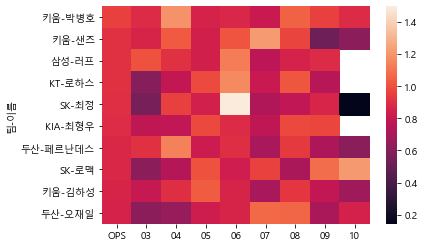

In [40]:
# 히트맵 시각화
sns.heatmap(df_selected.head(10))

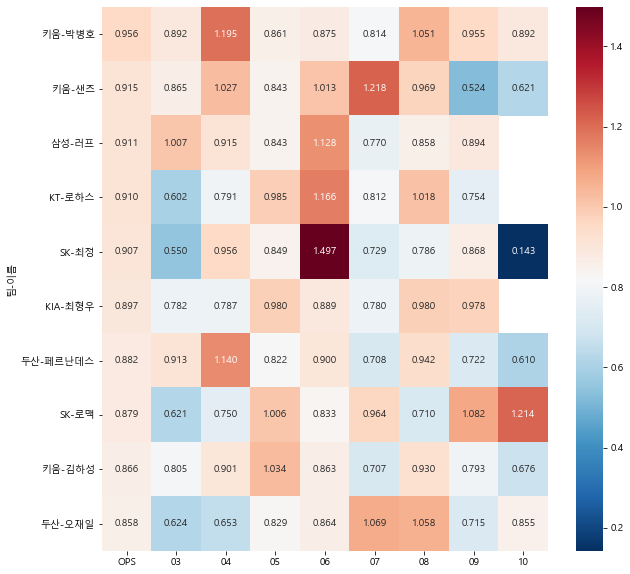

In [42]:
# 히트맵 시각화

fig, ax = plt.subplots(figsize = (10,10)) 
sns.heatmap(df_selected.head(10),
           annot = True, fmt = '.3f',
           cmap = 'RdBu_r') 

In [43]:
# 월별 ops를 시즌 ops 대비 +,- 값으로 변경하여 변화 정도 
# 시즌 전체 대비 월별 성적


for col in df_selected.columns[1:]:
    df_selected[col] = df_selected[col] - df_selected['OPS']
    
df_selected['OPS'] = 0.0
df_selected.head(10)


OPS        03        04        05        06        07        08  \
팀   이름                                                                       
키움  박병호    0.0 -0.063475  0.238734 -0.095127 -0.080836 -0.141487  0.095270   
    샌즈     0.0 -0.050561  0.111708 -0.072416  0.097932  0.302990  0.054363   
삼성  러프     0.0  0.095630  0.003913 -0.068009  0.216571 -0.141270 -0.052685   
KT  로하스    0.0 -0.308619 -0.119593  0.074405  0.255859 -0.097967  0.107532   
SK  최정     0.0 -0.356386  0.049590 -0.058236  0.590501 -0.178296 -0.121293   
KIA 최형우    0.0 -0.115653 -0.110560  0.082738 -0.008358 -0.117262  0.082570   
두산  페르난데스  0.0  0.031168  0.258011 -0.059901  0.017774 -0.173919  0.059357   
SK  로맥     0.0 -0.258323 -0.128586  0.127048 -0.045850  0.084623 -0.169463   
키움  김하성    0.0 -0.060754  0.035123  0.167553 -0.003182 -0.159562  0.064265   
두산  오재일    0.0 -0.234399 -0.204710 -0.029578  0.006167  0.210982  0.200106   

                 09        10  
팀   이름                         
키움  박병호   -0.000567 -0.063380  
    샌즈    -0.390866 -0.293913  
삼성  러프    -0.017367       NaN  
KT  로하스   -0.156262       NaN  
SK  최정    -0.038931 -0.764010  
KIA 최형우    0.080999       NaN  
두산  페르난데스 -0.160718 -0.272345  
SK  로맥     0.202937  0.335273  
키움  김하성   -0.073200 -0.190430  
두산  오재일   -0.143052 -0.003077

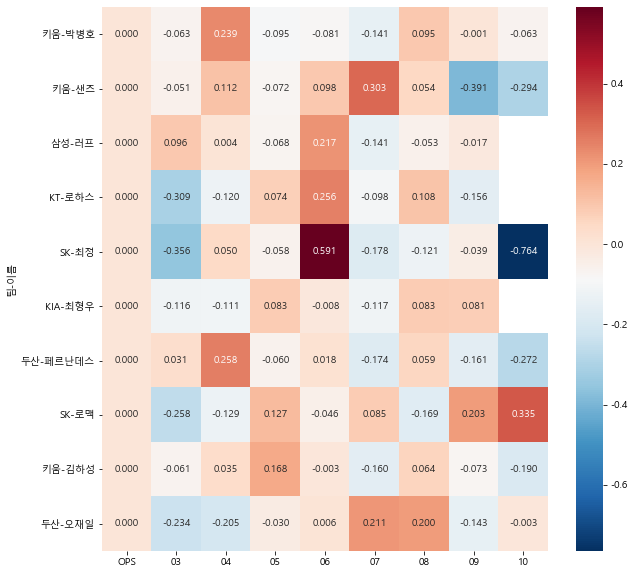

In [44]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_selected.head(10), annot = True, fmt = '.3f', cmap = 'RdBu_r')